# Prims Maps

In [1]:
import os
os.environ['HTTP_PROXY']=""
os.environ['HTTPS_PROXY']=""

## Prims Maps con KeplerGl

In [2]:
from keplergl import KeplerGl
import geopandas as gpd
import re
import fiona

file =  r"https://minsait-geospatial.s3.eu-west-3.amazonaws.com/data/Visualization/CONSTRU.gpkg"
gdf = gpd.read_file(file)
gdf = gdf.to_crs({'init': 'epsg:4326'})
gdf.head()

,MAPA,DELEGACIO,MUNICIPIO,MASA,PARCELA,HOJA,TIPO,CONSTRU,COORX,COORY,...,FECHABAJA,NINTERNO,PCAT1,PCAT2,EJERCICIO,NUM_EXP,CONTROL,REFCAT,PLANTAS_M,geometry
0,28306,28,6,41886,02,VK4848N,U,TRF,444053.77,4488788.79,...,99999999,None,4188602,VK4848N,NaN,NaN,NaN,4188602VK4848N,0.0,"POLYGON ((-3.66068 40.54793, -3.66078 40.54798..."
1,28306,28,6,54869,05,VK4858N,U,SUELO,445206.44,4488505.43,...,99999999,None,5486905,VK4858N,NaN,NaN,NaN,5486905VK4858N,0.0,"POLYGON ((-3.64702 40.54544, -3.64710 40.54545..."
2,28306,28,6,62842,03,VK4868S,U,P,446051.79,4488275.60,...,99999999,None,6284203,VK4868S,NaN,NaN,NaN,6284203VK4868S,0.0,"POLYGON ((-3.63710 40.54350, -3.63708 40.54350..."
3,28306,28,6,54753,03,VK4857N,U,P,445368.94,4487329.01,...,99999999,None,5475303,VK4857N,NaN,NaN,NaN,5475303VK4857N,0.0,"POLYGON ((-3.64507 40.53488, -3.64508 40.53488..."
4,28306,28,6,54753,03,VK4857N,U,TRF,445371.44,4487326.70,...,99999999,None,5475303,VK4857N,NaN,NaN,NaN,5475303VK4857N,0.0,"POLYGON ((-3.64498 40.53488, -3.64498 40.53487..."


In [3]:
#Create a basemap 
map = KeplerGl(height=600, width=800)
#show the map
# Add data to Kepler
map.add_data(data=gdf, name="CONSTRU")

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md


In [4]:
map

KeplerGl(data={'CONSTRU': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,…

## Prims Maps con Modelos Digitales de Elevación

Podemos representar un Modelo Digital de Elevaciones en 3D. Para ello usaremos los MDT del IGN generados con el vuelo LiDAR del PNOA. Descargamos un fichero asci (http://centrodedescargas.cnig.es).


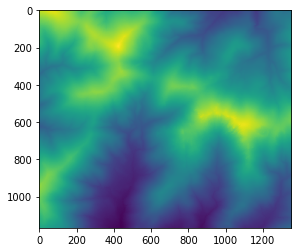

In [5]:
import rasterio as rio
from rasterio.plot import show
import numpy as np


file_mdt= "https://minsait-geospatial.s3.eu-west-3.amazonaws.com/data/SpatialDataModel/raster/MDT_Cercedilla.tif"
with rio.open(file_mdt) as src:
    z=src.read()
    nrows, ncols = src.shape
    x = np.linspace(src.bounds[0], src.bounds[2], ncols)
    y = np.linspace(src.bounds[1], src.bounds[3], nrows)
    x, y = np.meshgrid(x, y)

z= np.squeeze(z, axis=0)
show(z)

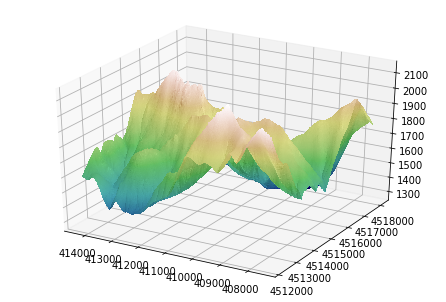

In [6]:
from matplotlib import cm
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ls = LightSource(270, 45)
rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb, linewidth=0, antialiased=False, shade=False)
ax.invert_xaxis()
plt.show()